In [369]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [370]:
#On charge les données 
df = pd.read_csv('Cardetails.csv')

In [371]:
#Apppercu des 10 premières lignes
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [372]:
#On supprime la colonne 'torque' car elle ne nous sera pas utile
df.drop(columns=['torque'], inplace=True)

In [373]:
#Nouveau apperçu 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [374]:
#Nombre lignes, colonnes de notre df
df.shape

(8128, 12)

In [375]:
#Nombre de valeures manquantes par colonnes 
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [376]:
#On supprime les valeures manquantes 
df.dropna(inplace=True)

In [377]:
#Nombre de lignes, colonnes après suppression des valeures manquantes
df.shape

(7907, 12)

In [378]:
#On compte les valeures double 
df.duplicated().sum()

1189

In [379]:
#On supprime les valeures double
df.drop_duplicates(inplace=True)

In [380]:
#Nombre de lignes, colonnes après suppression des valeures double
df.shape

(6718, 12)

In [381]:
#Afficher notre df après suppression des valeures double et valeures manquantes 
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [382]:
df.shape

(6718, 12)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [384]:
for col in df.columns:
    print('Les valeures uniques de la colonne : ' + col)
    print(df[col].unique())
    print("-------------------------")

Les valeures uniques de la colonne : name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
-------------------------
Les valeures uniques de la colonne : year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
-------------------------
Les valeures uniques de la colonne : selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   19000

In [385]:
#Fonction qui nous donne que le nom de la marque (premier mot
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [386]:
#Fonction qui nous permet de prendre la valeure d'une colonne sans l'unité de mesure
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [387]:
#test fonction
clean_data('1 2 12')

1.0

In [388]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [389]:
#Appliquer la fonction get_brand_name à la colonne 'name'
df['name'] = df['name'].apply(get_brand_name)

In [390]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [391]:
#les valeures de la colonne name 
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [392]:
from turtle import st  # Afficher les graphiques
import matplotlib.pyplot as plt
import seaborn as sns
#st.subheader("Prix moyen par marque")
avg_price_by_brand = df.groupby('name')['selling_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_price_by_brand.plot(kind='bar')
plt.xlabel('Marque')
plt.ylabel('Prix moyen')
st.pyplot()

AttributeError: 'function' object has no attribute 'pyplot'

In [393]:
import plotly.graph_objects as go

# Créer un sous-ensemble des données avec les marques et les prix moyens
avg_price_by_brand = df.groupby('name')['selling_price'].mean().sort_values(ascending=False)
# Prendre les 10 premières marques
top_10_brands = avg_price_by_brand.head(10)

# Créer un graphique à barres horizontales avec Plotly
fig = go.Figure(data=[go.Bar(
    x=top_10_brands.values,  # CAGR
    y=top_10_brands.index,   # Marque
    orientation='h',
    marker_color='blue'      # Couleur des barres
)])

# Personnalisation du graphique
fig.update_layout(
    title="Top 10 des marques par prix moyen",
    xaxis_title="Prix moyen",
    yaxis_title="Marque",
    yaxis=dict(autorange="reversed")  # Pour afficher les marques du haut vers le bas
)

fig.show()


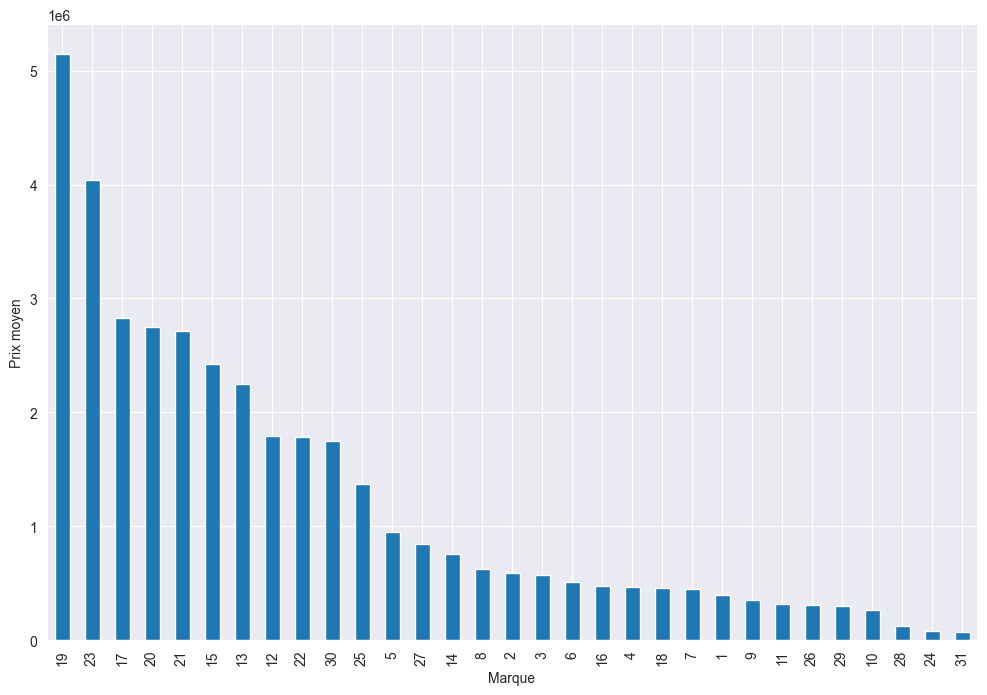

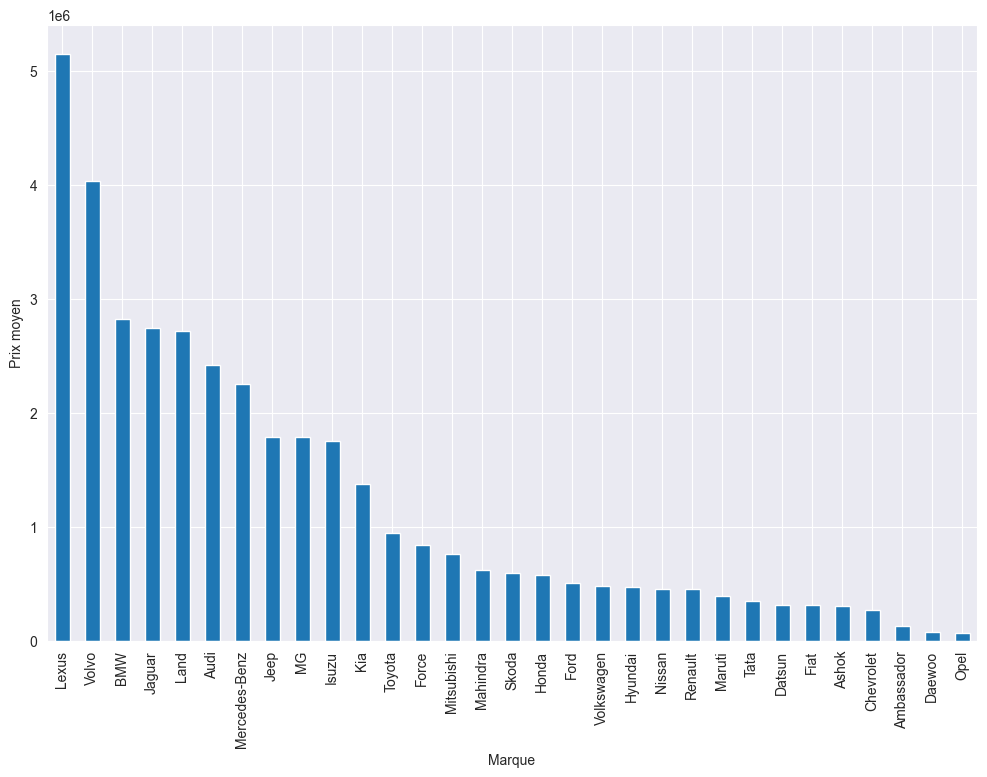

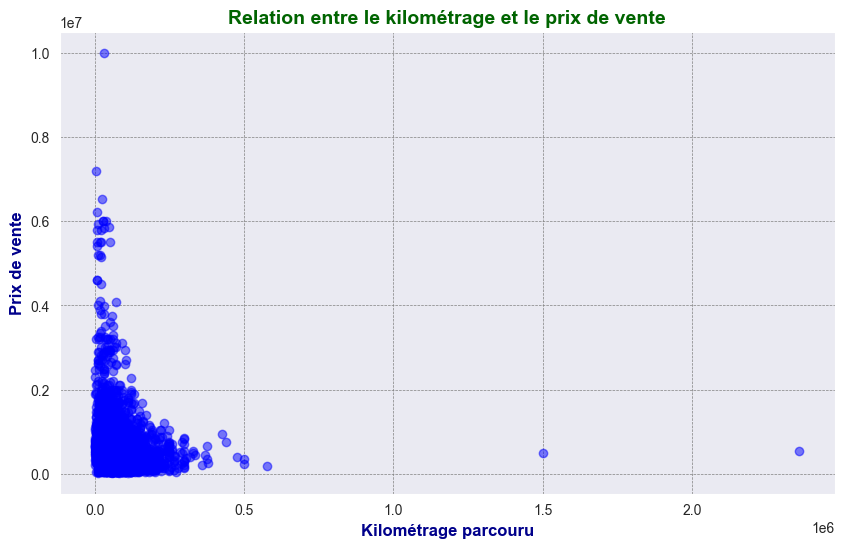

In [394]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['km_driven'], df['selling_price'], alpha=0.5, color='blue')  # Couleur des points
plt.xlabel('Kilométrage parcouru', fontsize=12, fontweight='bold', color='darkblue')  # Police améliorée pour l'axe x
plt.ylabel('Prix de vente', fontsize=12, fontweight='bold', color='darkblue')  # Police améliorée pour l'axe y
plt.title('Relation entre le kilométrage et le prix de vente', fontsize=14, fontweight='bold', color='darkgreen')  # Police améliorée pour le titre
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Ajout de grille en pointillés
plt.show()

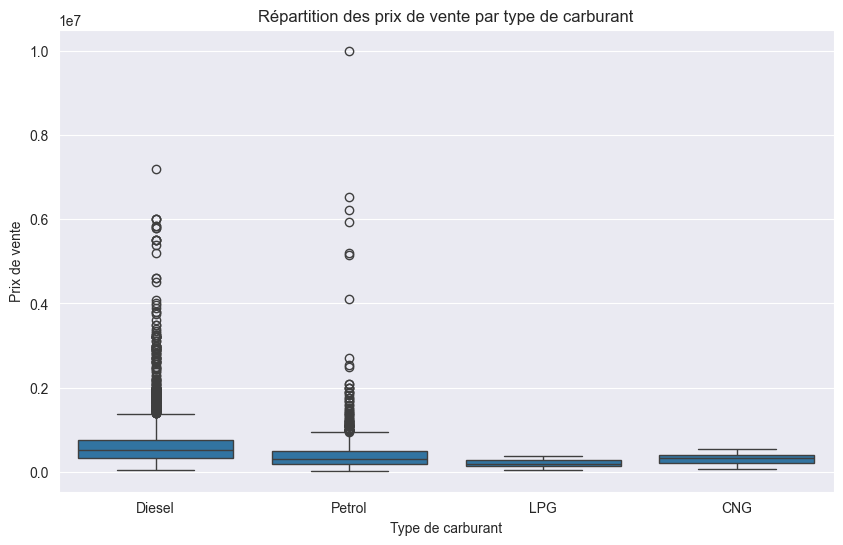

In [395]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.xlabel('Type de carburant')
plt.ylabel('Prix de vente')
plt.title('Répartition des prix de vente par type de carburant')
plt.show()

C:\Users\thek7\AppData\Local\Temp\ipykernel_2908\1670476012.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




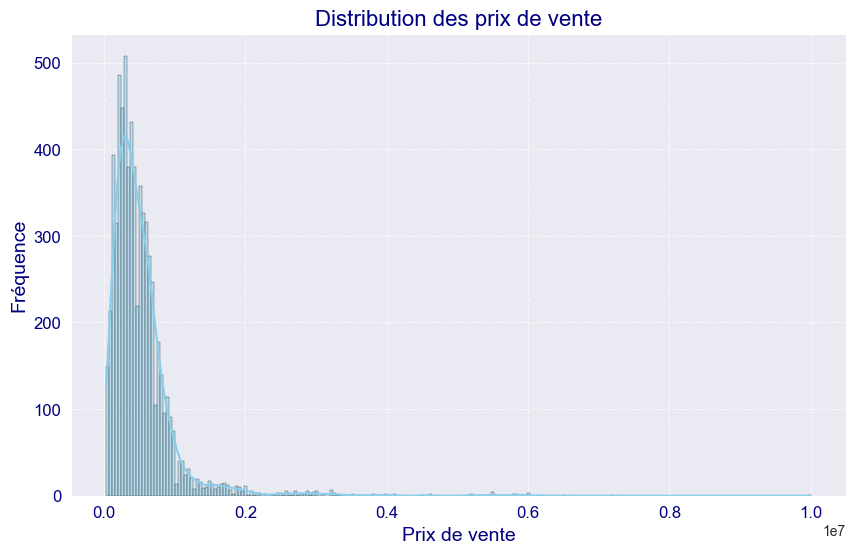

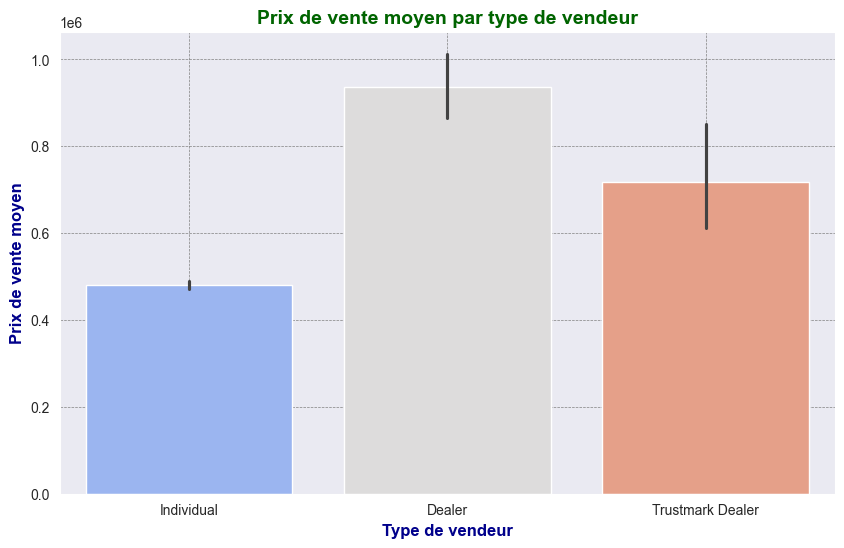

In [397]:
plt.figure(figsize=(10, 6))
sns.barplot(x='seller_type', y='selling_price', data=df, estimator=np.mean, palette='coolwarm')  # Couleur des barres
plt.xlabel('Type de vendeur', fontsize=12, fontweight='bold', color='darkblue')  # Police améliorée pour l'axe x
plt.ylabel('Prix de vente moyen', fontsize=12, fontweight='bold', color='darkblue')  # Police améliorée pour l'axe y
plt.title('Prix de vente moyen par type de vendeur', fontsize=14, fontweight='bold', color='darkgreen')  # Police améliorée pour le titre
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Ajout de grille en pointillés
plt.show()

C:\Users\thek7\AppData\Local\Temp\ipykernel_2908\278152337.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




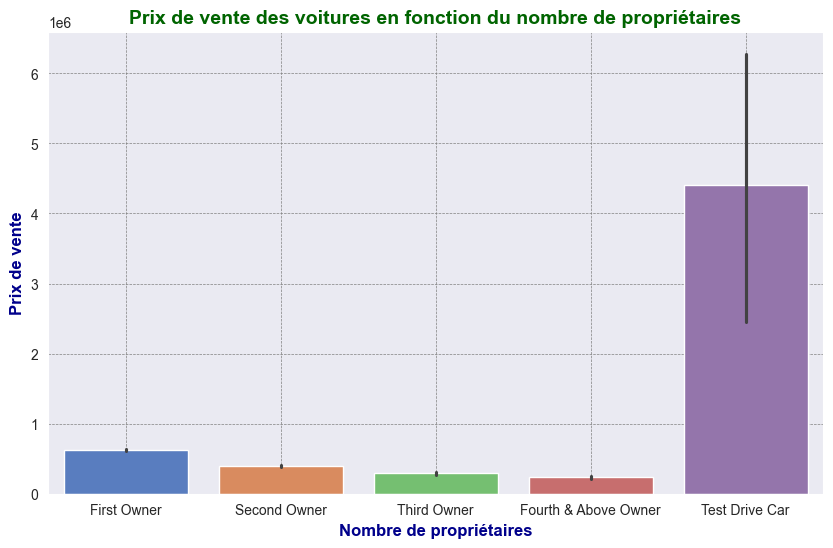

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='selling_price', data=df, palette='muted')  # Couleur des barres
plt.xlabel('Nombre de propriétaires', fontsize=12, fontweight='bold', color='darkblue')  # Police améliorée pour l'axe x
plt.ylabel('Prix de vente', fontsize=12, fontweight='bold', color='darkblue')  # Police améliorée pour l'axe y
plt.title('Prix de vente des voitures en fonction du nombre de propriétaires', fontsize=14, fontweight='bold', color='darkgreen')  # Police améliorée pour le titre
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Ajout de grille en pointillés
plt.show()


In [321]:
#Appliquer la fonction clean_data à la colonne 'mileage' (consommation km/l)
df['mileage'] = df['mileage'].apply(clean_data)

In [322]:
#Appliquer la fonction clean_data à la colonne 'engine' (bhp)
df['max_power'] = df['max_power'].apply(clean_data)

In [323]:
#Appliquer la fonction clean_data à la colonne 'engine' (cylindrée)
df['engine'] = df['engine'].apply(clean_data)

In [324]:
for col in df.columns:
    print('Les valeures unique de la colonne :  ' + col)
    print(df[col].unique())
    print("-------------------------")

Les valeures unique de la colonne :  name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
-------------------------
Les valeures unique de la colonne :  year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
-------------------------
Les valeures unique de la colonne :  selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   8

In [368]:
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [326]:
df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                   [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                   , inplace=True)

In [327]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [328]:
df['transmission'].replace(['Manual', 'Automatic'], [1, 2], inplace=True)

In [329]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [330]:
df['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [1, 2, 3], inplace=True)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [332]:
df_resu = df.describe()

In [333]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [335]:
df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'], [1, 2, 3, 4], inplace=True)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [337]:
df.reset_index(inplace=True)

In [338]:
df

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [339]:
df.shape

(6718, 13)

In [340]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [341]:
df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                    [1,2,3,4,5], inplace=True)

In [342]:
df.drop(columns=['index'], inplace=True)

In [343]:
for col in df.columns:
    print('------------')
    print(col)
    print(df[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [344]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [345]:
input_data = df.drop(columns=['selling_price'])
output_data =df['selling_price']

In [346]:
output_data

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
6713    260000
6714    475000
6715    320000
6716    135000
6717    382000
Name: selling_price, Length: 6718, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

# Calcul du prix moyen par année de fabrication
avg_price_by_year = df.groupby('year')['selling_price'].mean()

plt.figure(figsize=(12, 8))
avg_price_by_year.plot(kind='line', marker='o', color='royalblue', linewidth=2)

plt.title('Prix moyen par année de fabrication', fontsize=18, color='navy', fontweight='bold')
plt.xlabel('Année de fabrication', fontsize=14, color='navy')
plt.ylabel('Prix moyen (en €)', fontsize=14, color='navy')

plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
from turtle import st  # Afficher les graphiques
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=20, color='skyblue', edgecolor='black')  # Histogramme principal
plt.xlabel('Prix de vente')
plt.ylabel('Fréquence')
plt.title('Distribution des prix de vente des voitures')

# Ajout de couleurs pour les barres de l'histogramme
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 
          'lightsteelblue', 'lightseagreen', 'lightgrey', 'lightcyan', 'lightyellow',
          'lightgoldenrodyellow', 'lightblue', 'lightgreen', 'lightcoral', 'lightsalmon',
          'lightpink', 'lightsteelblue', 'lightseagreen', 'lightgrey', 'lightcyan']

for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colors[i % len(colors)])

plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df, hue='fuel', palette=palette, dodge=False, legend=False)

plt.xlabel('Type de carburant')
plt.ylabel('Prix de vente')
plt.title('Répartition des prix de vente par type de carburant')
plt.show()


In [352]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2) 

In [353]:
y_train

3431     550000
3492    2100000
423     1050000
2977     650000
3895     500000
         ...   
2097     450000
1156     472000
2196    1125000
4850     551000
2311     960000
Name: selling_price, Length: 5374, dtype: int64

In [354]:
#model Creation

In [355]:
model = LinearRegression()

In [356]:
#Train MOdel

In [357]:
model.fit(x_train, y_train)

LinearRegression()

In [358]:
predict = model.predict(x_test)

In [359]:
predict

array([ 684461.10054854, 1332494.59221777,  513639.03283915, ...,
        239930.49207006,  368297.07476519,   32493.07166931])

In [360]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
3431,1,2016,50000,1,1,1,1,25.2,1248.0,74.0,5.0


In [361]:
input_data_model = pd.DataFrame(
    [[5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [362]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,5,2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0


In [363]:
model.predict(input_data_model)

array([1015881.82703359])

In [364]:
import pickle as pk

In [365]:
pk.dump(model,open('model.pkl','wb'))

In [366]:
input_data

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,119000,1,1,1,4,16.80,1493.0,110.00,5.0
